In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv("uber.csv")

In [77]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [79]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         200000 non-null  int64              
 1   key                200000 non-null  object             
 2   fare_amount        200000 non-null  float64            
 3   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   200000 non-null  float64            
 5   pickup_latitude    200000 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 13.7+ MB


In [81]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [82]:
# Find the missing values
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [83]:
df_without_field = df.drop(columns=['key'])
df_without_field.corr()

,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
Unnamed: 0,1.000000,0.000589,-0.001124,0.000230,-0.000341,0.000270,0.000271,0.002257
fare_amount,0.000589,1.000000,0.122769,0.010457,-0.008481,0.008986,-0.011014,0.010150
pickup_datetime,-0.001124,0.122769,1.000000,0.009362,-0.009677,0.008018,-0.010805,0.006394
pickup_longitude,0.000230,0.010457,0.009362,1.000000,-0.816461,0.833026,-0.846324,-0.000414
pickup_latitude,-0.000341,-0.008481,-0.009677,-0.816461,1.000000,-0.774787,0.702367,-0.001560
dropoff_longitude,0.000270,0.008986,0.008018,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,0.000271,-0.011014,-0.010805,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.002257,0.010150,0.006394,-0.000414,-0.001560,0.000033,-0.000659,1.000000


In [84]:
df.dropna(inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb598105210>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb598105d20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb598105540>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb598106320>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb5981065c0>],
 'means': []}

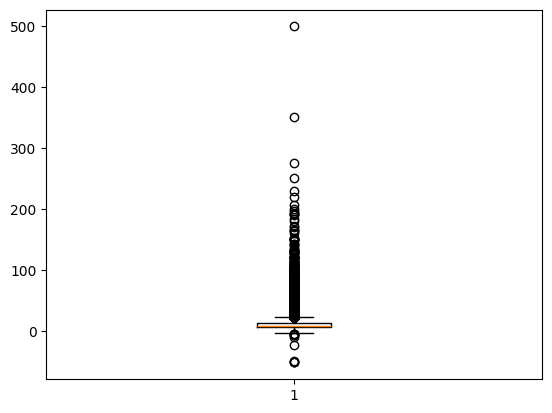

In [85]:
plt.boxplot(df['fare_amount'])

In [86]:
q1 = df["fare_amount"].quantile(0.25)
q3 = df["fare_amount"].quantile(0.75)

# print(q1, q3)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)

print(lwr_bound, upr_bound)

-3.75 22.25


In [87]:
import calendar
df['day']=df['pickup_datetime'].apply(lambda x:x.day)
df['hour']=df['pickup_datetime'].apply(lambda x:x.hour)
df['weekday']=df['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
df['month']=df['pickup_datetime'].apply(lambda x:x.month)
df['year']=df['pickup_datetime'].apply(lambda x:x.year)

df.weekday = df.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

# Drop the not required one
df.drop(["key","pickup_datetime"], axis=1, inplace=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   fare_amount        199999 non-null  float64
 2   pickup_longitude   199999 non-null  float64
 3   pickup_latitude    199999 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    199999 non-null  int64  
 7   day                199999 non-null  int64  
 8   hour               199999 non-null  int64  
 9   weekday            199999 non-null  int64  
 10  month              199999 non-null  int64  
 11  year               199999 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 19.8 MB


In [89]:
# Predicting using Linear Regression
from sklearn.model_selection import train_test_split

x = df.drop("fare_amount", axis=1)
y = df['fare_amount']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

x_train.head()

,Unnamed: 0,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
80768,37342228,-73.983703,40.725752,-73.972000,40.793888,1,22,1,0,2,2009
111783,34052804,-73.961175,40.760667,-73.976507,40.747570,1,7,14,6,3,2009
24615,52939040,-73.947784,40.783111,-73.955408,40.779405,1,17,11,4,3,2011
46932,20073661,-73.980596,40.733797,-73.972092,40.747297,1,15,7,5,1,2010
86655,28423842,-73.963035,40.758380,-73.987877,40.745477,2,28,19,6,6,2014


In [90]:
from sklearn.linear_model import LinearRegression

lrmodel=LinearRegression()
lrmodel.fit(x_train, y_train)

predictedvalues = lrmodel.predict(x_test)

# lets calculate rmse for linear Regression model
from sklearn.metrics import mean_squared_error
lrmodelrmse = np.sqrt(mean_squared_error(predictedvalues, y_test))
print("RMSE value for Linear regression is", lrmodelrmse)

RMSE value for Linear regression is 9.806686634823958


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators=100, random_state=101)
rfrmodel.fit(x_train,y_train)
rfrmodel_pred= rfrmodel.predict(x_test)

In [ ]:
rfrmodel_rmse=np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
print("RMSE value for Random forest regression is ",rfrmodel_rmse)